In [ ]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Information regarding fields and records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Statistical info regarding the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


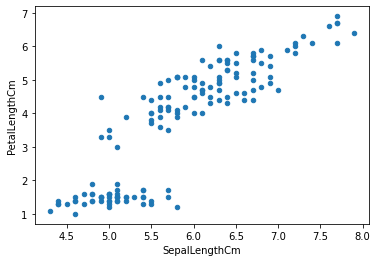

In [ ]:
#Scatterplot for SepalLength vs PetalLength 
df.plot(kind ="scatter",
          x ='SepalLengthCm',
          y ='PetalLengthCm')

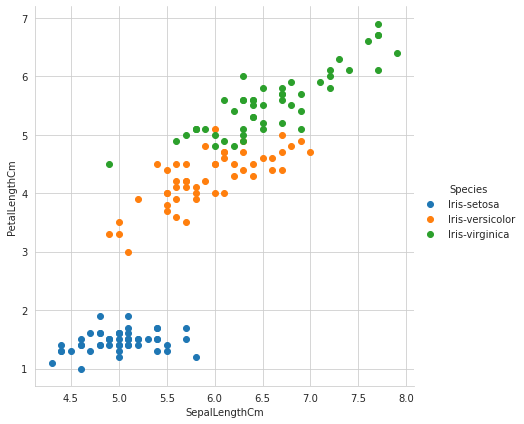

In [ ]:
#Scatterplot for SepalLength vs PetalLength along with Species
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="Species",height = 6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

In [ ]:
#Storing SepalLength, PetalLength in a new dataset
data = [df['SepalLengthCm'],df['PetalLengthCm']]
headers = ["SepalLengthCm", "PetalLengthCm"]
X = pd.concat(data, axis=1, keys=headers)

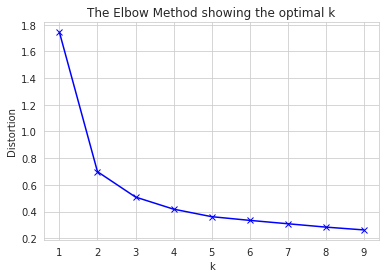

In [ ]:
#Elbow Method to determine optimum k value
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#Scaling the dataset
import sklearn.preprocessing as pp
scaler = pp.StandardScaler() 
scaled_df = scaler.fit_transform(X) 

In [ ]:
#Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.632416665977203
For n_clusters=3, the silhouette score is 0.5445215684482618
For n_clusters=4, the silhouette score is 0.5468465065294456
For n_clusters=5, the silhouette score is 0.5038432150429774
For n_clusters=6, the silhouette score is 0.43552016110861974
For n_clusters=7, the silhouette score is 0.44711922663245635
For n_clusters=8, the silhouette score is 0.4640647543478107


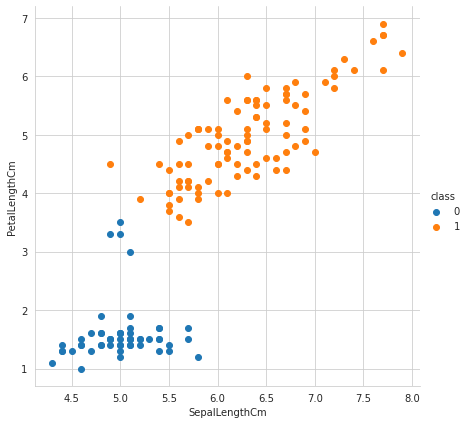

In [ ]:
#KMeans Clustering with k=2
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
X['class']=yhat
sns.set_style("whitegrid")
sns.FacetGrid(X, hue ="class",height = 6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()